#**$CO_2$ Analysis**

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import time
from datetime import datetime, date, time, timedelta
from google.colab import data_table
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set(font_scale=1.5)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
from calendar import month_abbr
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import text

## 0.files preperation: Run the next cells to define df1

In [ ]:
# #reading the raw data file
# file_path = '/content/drive/MyDrive/Greenwall/co2_and_counting_people/data_25_05_2021-02_05_2022.xlsx'
# df_raw = pd.read_excel(file_path) # reading the raw date (xlsx)
# df_raw = df_raw[3:]
# df_raw=df_raw.drop(['RECORD'], axis=1)


# update_co2 = pd.DataFrame()
# update_co2['TIMESTAMP'] = df_raw["TIMESTAMP"]
# update_co2['TIMESTAMP'] = pd.to_datetime(update_co2['TIMESTAMP'])

# # create df with columns of valves values:
# for i in range (1,11):
#   update_co2[i] = df_raw.loc[df_raw['Valve_no']== i, "CO2_Avg"]
# update_co2=update_co2.set_index('TIMESTAMP')

# # change the column names and dtype
# update_co2.columns = df.columns
# update_co2 =update_co2.astype(float, errors = 'raise')

# # resample:
# update_co2_resampled = update_co2.resample('30min').mean() #resample all the data

# # save:
# update_co2_resampled.to_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_25_05_2021-02_05_2022.xlsx")

In [ ]:
# update_co2

##1.Loading the data

**$$01/02/2021 - 09/05/2021$$**

**$$25/05/2021 - 02/05/2022$$**

use cell 1 here it will be more fast (combine the files)

In [ ]:
path1 = "/content/drive/MyDrive/Greenwall/co2_and_counting_people/df1.xlsx"
path2 = "/content/drive/MyDrive/Greenwall/co2_and_counting_people/Clean_data/co2_02052022.xlsx"
# path2 = "/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_25_05_2021-02_05_2022.xlsx"
df1 = pd.read_excel(path1)
df2 = pd.read_excel(path2)
df2.columns = df1.columns
df = pd.concat([df1,df2]) # connecting the to df into 1
df = df.set_index('TIMESTAMP')
# Save the concated file:
df.to_csv("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Clean_data/01022021_02052022.csv") 

In [ ]:
# reading the data:
# df = pd.read_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Clean_data/co2_02052022.xlsx")
# df = df.set_index('TIMESTAMP')
# df.columns = ["1","2","3","4","5","6","7","8","9","10"]
# df

## 2.Data cleaning:
1. delete values beneath 299
2. delete values outside above 650
3. Delete dates that i have experience of high co2 in the lab.

In [ ]:
df = df[df >299]
df = df[df['10']<=650] #delete high values outside
df = df[df['9']<=650] #delete high values outside
#delete dates due to experiments:
end = "2022-04-24 00:00:00"
df = df[:end]
df

1       2       3       4       5       6       7  \
TIMESTAMP                                                                     
2021-02-01 13:00:00  725.30  715.65  746.65  748.05  761.70  807.55  767.50   
2021-02-01 13:30:00  902.50  832.00  838.00  851.50  851.00  851.00  851.00   
2021-02-01 14:00:00  856.00  863.00  871.00  875.50  884.00  882.00  875.50   
2021-02-01 14:30:00  922.00  910.00  918.50  923.00  921.00  921.00  921.00   
2021-02-01 15:00:00  814.00  783.10  750.85  707.75  688.95  693.20  707.20   
...                     ...     ...     ...     ...     ...     ...     ...   
2022-04-23 21:45:00  408.50  406.70  403.40  407.30  407.30  407.30  403.40   
2022-04-23 22:15:00  396.20  395.50  395.85  395.15  394.60  397.20  395.15   
2022-04-23 22:45:00  390.00  390.65  390.20  389.70  389.70  389.70  390.05   
2022-04-23 23:15:00  385.40  386.45  386.30  385.65  388.25  390.95  389.65   
2022-04-23 23:45:00  382.75  383.95  383.65  385.20  385.20  385.20  386.75   

                          8       9      10  
TIMESTAMP                                    
2021-02-01 13:00:00  766.40  431.00  429.50  
2021-02-01 13:30:00  842.50  433.65  431.85  
2021-02-01 14:00:00  891.50  438.10  434.10  
2021-02-01 14:30:00  939.50  447.25  437.90  
2021-02-01 15:00:00  718.30  433.85  431.25  
...                     ...     ...     ...  
2022-04-23 21:45:00  399.85  377.00  376.85  
2022-04-23 22:15:00  393.80  374.90  375.20  
2022-04-23 22:45:00  389.95  375.35  375.85  
2022-04-23 23:15:00  385.05  375.65  379.20  
2022-04-23 23:45:00  385.20  375.15  374.55  

[20631 rows x 10 columns]

## 3.Basic vizualization and info

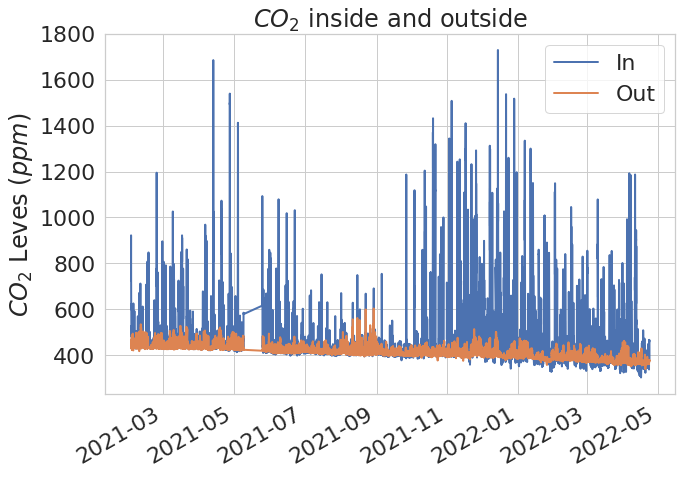

In [ ]:
# graph in and out
sns.set_theme(style="whitegrid",font_scale = 2)
fig, ax = plt.subplots(1, figsize=(10,7.5))
ax.plot(df['1'],label='In',  linewidth=2)
ax.plot(df['10'],label='Out',  linewidth=2)
ax.set(xlabel=" ",
       ylabel="$CO_2$ Leves ($ppm$)",
       title="$CO_2$ inside and outside");
plt.legend(loc='best')
plt.gcf().autofmt_xdate()  # makes slated dates

# Save
plt.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_analysis_charts/'
# plt.savefig(save_results_to + 'in_out_co2_timeseries.png')

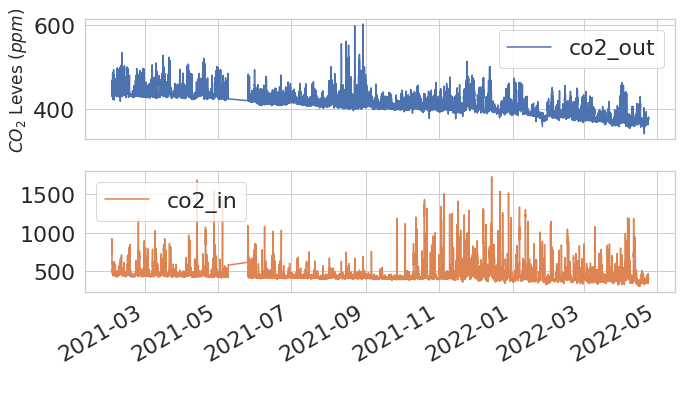

In [ ]:
df.columns = ["co2_in","2","3","4","5","6","7","8","9","co2_out"]
axes = df[['co2_out',"co2_in"]].plot(subplots=True, figsize=(10, 6),xlabel = " ")
axes[0].set_ylabel('$CO_2$ Leves ($ppm$)',fontsize = 17)
# axes[1].set_ylabel('RH (%)',fontsize = 17)
plt.tight_layout()
# plt.savefig(save_results_to + 'one_hour_resample_time_series.png')

# change the column names baack:
df.columns = df1.columns[1:]

In [ ]:
# iteractive plot for caculte Ca of Amax:
pd.options.plotting.backend = "plotly"

fig = df.plot(title="$CO_2$ inside and outside", template="simple_white")
fig.show()

In [ ]:
df.describe()

1             2             3             4             5  \
count  20622.000000  20620.000000  20620.000000  20622.000000  20624.000000   
mean     465.416138    467.107413    466.844113    465.307228    465.968023   
std      123.802439    127.096859    126.840353    128.080041    128.980502   
min      302.750000    301.900000    301.550000    300.650000    302.100000   
25%      408.350000    408.500000    408.050000    405.212500    405.950000   
50%      432.025000    432.400000    432.150000    430.700000    431.800000   
75%      470.300000    471.250000    470.950000    469.437500    469.900000   
max     1729.500000   1860.000000   1736.500000   2306.000000   2165.000000   

                  6             7             8             9            10  
count  20624.000000  20626.000000  20630.000000  20631.000000  20631.000000  
mean     468.844759    470.520826    467.346600    416.103534    414.770666  
std      128.721947    128.355773    128.461653     29.243856     26.811763  
min      302.100000    306.800000    304.050000    341.000000    339.550000  
25%      409.300000    410.750000    409.500000    397.700000    397.600000  
50%      433.300000    434.200000    433.200000    413.800000    412.950000  
75%      471.712500    472.787500    469.950000    432.100000    430.750000  
max     1586.000000   1582.000000   2986.000000    648.000000    603.300000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20631 entries, 2021-02-01 13:00:00 to 2022-04-23 23:45:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       20622 non-null  float64
 1   2       20620 non-null  float64
 2   3       20620 non-null  float64
 3   4       20622 non-null  float64
 4   5       20624 non-null  float64
 5   6       20624 non-null  float64
 6   7       20626 non-null  float64
 7   8       20630 non-null  float64
 8   9       20631 non-null  float64
 9   10      20631 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


## 4.**Seasonality and Day/Night differences in & out**

### General distribution in and out:

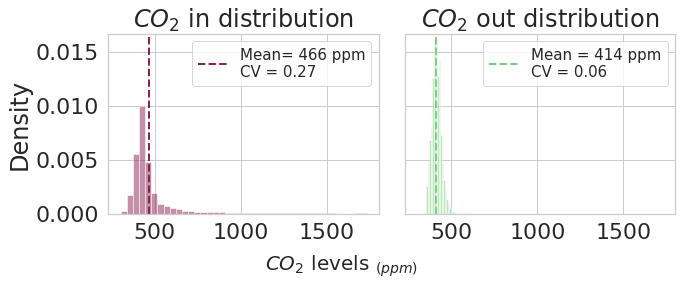

In [ ]:
# CV for the 2 columns:
cv_in = round(df['1'].std()/df['1'].mean(),2)
cv_out = round(df['10'].std()/df['10'].mean(),2)
# Build the plot
fig, axes = plt.subplots(1, 2,sharex=True,sharey = True, figsize=(10,4))
# create bar:
axes[0].hist(x = df['1'],density=True,bins = 40,color = "#8B2252",alpha = 0.5)
## meanlines:
axes[0].axvline(x=df['1'].mean(),color='#8B2252',ls = "--",lw=2,
                label = f"Mean= {int(df['3'].mean())} ppm\nCV = {cv_in}")
axes[0].set_title('$CO_2$ in distribution')
axes[0].set_ylabel('Density')
axes[0].legend(loc='best',fontsize = 15)

#  Graph out
axes[1].hist(x=df['10'],density=True,bins = 30,color = "#7CCD7C",alpha = 0.5)
plt.axvline(x=df['10'].mean(),color='#7CCD7C',ls = "--",lw=2,
            label = f"Mean = {int(df['10'].mean())} ppm\nCV = {cv_out}")
axes[1].set_title('$CO_2$ out distribution')
axes[1].legend(loc='best',fontsize = 15)
# axes[0].set_xlim(350,800)
fig.text(0.5, 0.01, '$CO_2$ levels $_{(ppm)}$', va='center', ha='center', fontsize=20)
# Save the figure and show
plt.tight_layout()
# plt.savefig(save_results_to + 'distribution_bars.png',bbox_inches = "tight")

### Seasons differences outside:

1. create df with the relevant data

2. Resample the data to 3 hours average in order to reduce the noise.
  volve 3 represent the levels inside and volve 10 outside.
3. add a "season" column and goup the data by season

3. Plot the seasons distribution and present summery statistics.

In [ ]:
# df with out and in:
df_in_out = pd.DataFrame()
df_in_out = df[['1','10']].copy()
df_in_out.columns = ["in","out"]

# resample to 3 hours average:
df_in_out = df_in_out.resample('3H').mean()

# add season column
date = df_in_out.index.month*100 + df_in_out.index.day # array of numbers contain the month num*100 + day num
df_in_out['season'] = (pd.cut(date,[0,228,531,831,1130,1300], #values between them there are season
                       labels=['winter','spring','summer','autumn','winter ']) #convert the month to season
                  )
df_in_out['season'].replace({"winter ": "winter"}, inplace=True) # make sure we do not have different values of winter
# df_in_out['season'].unique()  #uncomment to see that we have all seasons
df_in_out

in         out  season
TIMESTAMP                                          
2021-02-01 12:00:00  851.450000  433.337500  winter
2021-02-01 15:00:00  671.791667  445.350000  winter
2021-02-01 18:00:00  575.591667  463.591667  winter
2021-02-01 21:00:00  505.933333  436.058333  winter
2021-02-02 00:00:00  520.633333  433.125000  winter
...                         ...         ...     ...
2022-04-23 09:00:00  344.658333  362.975000  spring
2022-04-23 12:00:00  340.608333  363.841667  spring
2022-04-23 15:00:00  430.450000  367.875000  spring
2022-04-23 18:00:00  462.216667  373.241667  spring
2022-04-23 21:00:00  400.275000  376.400000  spring

[3572 rows x 3 columns]

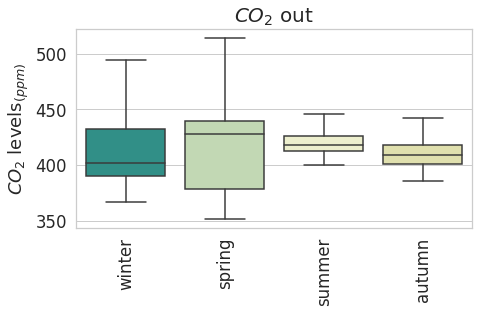

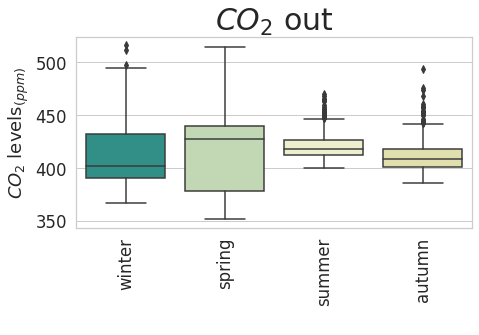

In [ ]:
palette = ["#219F94","#C1DEAE","#F2F5C8","#E8E8A6"]
# Graph without outlayers
sns.set_theme(style="whitegrid",font_scale = 1.5)
plt.subplots(1, figsize=(7,5))
a = sns.boxplot(data=df_in_out, x='season', y="out",showfliers = False,palette = palette)
a.set_ylabel("$CO_2$ levels$_{(ppm)}$")
a.set_xlabel(" ")
a.set_title("$CO_2$ out",fontsize = 20 )
plt.xticks(rotation=90)
# save:
plt.tight_layout()
# plt.savefig(save_results_to + 'season_dist_no_outlayers.png')

# Graph with outlayers
sns.set_theme(style="whitegrid",font_scale = 1.5)
plt.subplots(1, figsize=(7,5))
a = sns.boxplot(data=df_in_out, x='season', y="out",palette = palette)
a.set_ylabel("$CO_2$ levels$_{(ppm)}$")
a.set_xlabel(" ")
a.set_title("$CO_2$ out",fontsize = 30)
plt.xticks(rotation=90) #rotate the x labels
# save
plt.tight_layout()
# plt.savefig(save_results_to + 'season_dist_with_outlayers.png')

In [ ]:
describe_df = df_in_out.groupby('season').describe()
describe_df['out']

count        mean        std         min         25%         50%  \
season                                                                      
winter   929.0  411.672891  28.033137  367.050000  390.300000  401.708333   
spring  1039.0  415.839665  35.136018  351.633333  378.095833  427.775000   
summer   736.0  421.019315  11.571932  400.066667  412.750000  418.100000   
autumn   727.0  411.527282  13.589421  386.050000  401.304167  408.641667   

               75%         max  
season                          
winter  432.125000  515.941667  
spring  439.395833  514.150000  
summer  426.227083  470.300000  
autumn  417.595833  493.916667

### Day and Night differences + seasons

1. Add column of daytime.

2. Plot day and night distribiution

3. plot day and night distribution over the seasons

4. Statistical Analysis

In [ ]:
# day/night column

def f(x):
    if (x.hour > 7) and (x.hour <= 19):
        return 'Day'
    else:
        return'Night'

df_in_out['day_night'] = df_in_out.index.to_series().apply(f)
df_in_out

in         out  season day_night
TIMESTAMP                                                    
2021-02-01 12:00:00  851.450000  433.337500  winter       Day
2021-02-01 15:00:00  671.791667  445.350000  winter       Day
2021-02-01 18:00:00  575.591667  463.591667  winter       Day
2021-02-01 21:00:00  505.933333  436.058333  winter     Night
2021-02-02 00:00:00  520.633333  433.125000  winter     Night
...                         ...         ...     ...       ...
2022-04-23 09:00:00  344.658333  362.975000  spring       Day
2022-04-23 12:00:00  340.608333  363.841667  spring       Day
2022-04-23 15:00:00  430.450000  367.875000  spring       Day
2022-04-23 18:00:00  462.216667  373.241667  spring       Day
2022-04-23 21:00:00  400.275000  376.400000  spring     Night

[3572 rows x 4 columns]

day & night distribiutions:

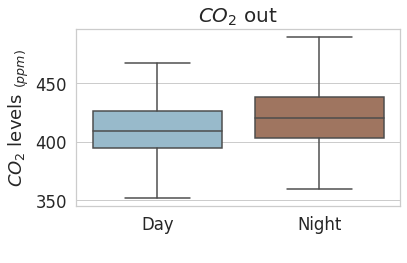

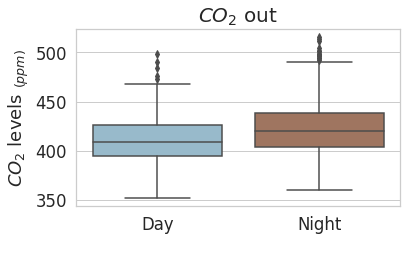

In [ ]:
palette = ["#8FBDD3","#A97155"]
plt.subplots(1, figsize=(6,4))
a = sns.boxplot(data=df_in_out, x='day_night', y="out",palette=palette,showfliers = False)
a.set_ylabel("$CO_2$ levels $_{(ppm)}$",fontsize = 18)
a.set_xlabel(" ")
a.set_title("$CO_2$ out",fontsize = 20 )
# save:
plt.tight_layout()
plt.savefig(save_results_to + 'daytime_dist_no_outlayers.png')

# with outlayers:
plt.subplots(1, figsize=(6,4))
a = sns.boxplot(data=df_in_out, x='day_night', y="out",palette=palette)
a.set_ylabel("$CO_2$ levels $_{(ppm)}$",fontsize = 18)
a.set_xlabel(" ")
a.set_title("$CO_2$ out",fontsize = 20 )
# save:
plt.tight_layout()
# plt.savefig(save_results_to + 'daytime_dist_with_outlayers.png')

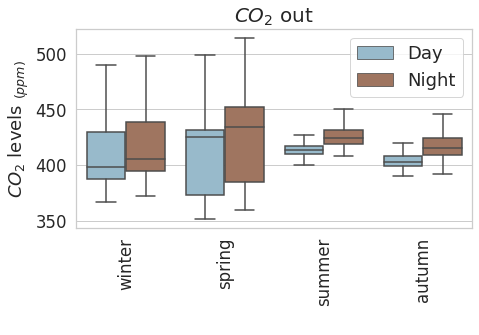

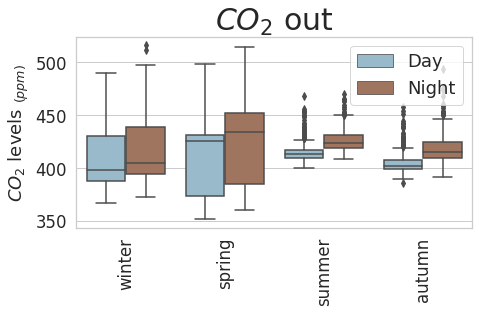

In [ ]:
sns.set_theme(style="whitegrid",font_scale = 1.5)
plt.subplots(1, figsize=(7,5))
a = sns.boxplot(data=df_in_out, x='season', y="out",hue ="day_night",palette=palette,showfliers = False)
a.set_ylabel("$CO_2$ levels $_{(ppm)}$")
a.set_xlabel(" ")
a.set_title("$CO_2$ out",fontsize = 20 )
plt.xticks(rotation=90)
plt.legend(title=None,fontsize=18)
plt.tight_layout()
# plt.savefig(save_results_to + 'daytime+season_dist_no_outlayers.png')


sns.set_theme(style="whitegrid",font_scale = 1.5)
plt.subplots(1, figsize=(7,5))
a = sns.boxplot(data=df_in_out, x='season', y="out",hue ="day_night",palette=palette)
a.set_ylabel("$CO_2$ levels $_{(ppm)}$")
a.set_xlabel(" ")
a.set_title("$CO_2$ out",fontsize = 30)
plt.xticks(rotation=90)
plt.legend(title=None,fontsize=18)
plt.tight_layout()
# plt.savefig(save_results_to + 'daytime+season_dist_with_outlayers.png')

### Daytime and seasons statistical analysis:

#### Day/Night T test:

In [ ]:
days = df_in_out[df_in_out['day_night'] =="Day"]
days = days['out']
nights = df_in_out[df_in_out['day_night'] =="Night"]
nights = nights['out']

In [ ]:
# Apply T test:
!pip install researchpy
import researchpy as rp
summary, results = rp.ttest(group1= days, group1_name= "Day",
         group2=  nights, group2_name= "Night")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
summary #summary statistics

Variable       N        Mean         SD        SE   95% Conf.    Interval
0       Day  1715.0  408.315699  22.452604  0.542169  407.252316  409.379081
1     Night  1716.0  421.498050  27.282449  0.658605  420.206297  422.789803
2  combined  3431.0  414.908795  25.836699  0.441089  414.043971  415.773620

In [ ]:
results #ttest results

Independent t-test    results
0  Difference (Day - Night) =    -13.1824
1        Degrees of freedom =   3429.0000
2                         t =    -15.4522
3     Two side test p value =      0.0000
4    Difference < 0 p value =      0.0000
5    Difference > 0 p value =      1.0000
6                 Cohen's d =     -0.5276
7                 Hedge's g =     -0.5275
8             Glass's delta =     -0.5871
9               Pearson's r =      0.2551

In [ ]:
# export to excel:
summary_results = pd.concat([summary,results])
# summary_results.to_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_analysis_charts/summary_statistics_daytime.xlsx")

#### Seasons Anova test:

In [ ]:
# # Create the groups
# summer= df_in_out[df_in_out['season'] =="summer"]
# summer = summer['out']
# winter= df_in_out[df_in_out['season'] =="winter"]
# winter = winter['out']
# autumn= df_in_out[df_in_out['season'] =="autumn"]
# autumn = autumn['out']
# spring =  df_in_out[df_in_out['season'] =="spring "]
# spring  = spring ['out']

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value

fvalue, pvalue = stats.f_oneway(df_in_out[df_in_out['season'] =="summer"]['out'],
               df_in_out[df_in_out['season'] =="winter"]['out'],
               df_in_out[df_in_out['season'] =="autumn"]['out'],
               df_in_out[df_in_out['season'] =="spring"]['out'])
print(fvalue, pvalue)

nan nan


In [ ]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
!pip install bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_in_out, res_var='out', xfac_var='season', anova_model='out ~ C(season)')
anova_results = res.tukey_summary
# anova_results.to_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_analysis_charts/summary_statistics_season.xlsx")
anova_results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=ca791387c63e4976054b6b572aa786d6642a2fb7c1d0b7027fc16079e5821443
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=a0fbdb268a99007955d1d302ed8942e3185c26597d1075ba684eed3270b352c7
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1  group2      Diff     Lower      Upper    q-value   p-value
0  winter  spring  4.166774  1.197448   7.136100   5.100807  0.001786
1  winter  summer  9.346424  6.101375  12.591474  10.469380  0.001000
2  winter  autumn  0.145608 -3.110630   3.401846   0.162542  0.900000
3  spring  summer  5.179650  2.011444   8.347857   5.942699  0.001000
4  spring  autumn  4.312382  1.132717   7.492047   4.929839  0.002795
5  summer  autumn  9.492033  6.053469  12.930596  10.034113  0.001000

### All togather Anova and tukey test

I will create new column that classify the sample into daytime + season and will make anova test and tukey test to compare:

In [ ]:
df_in_out["daytime_and_season"] = df_in_out['season'].astype(str) + '_' + df_in_out['day_night'].astype(str)
df_in_out["daytime_and_season"].unique()

array(['winter_Day', 'winter_Night', 'spring_Night', 'spring_Day',
       'summer_Night', 'summer_Day', 'autumn_Night', 'autumn_Day'],
      dtype=object)

In [ ]:
# df_in_out.to_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_analysis_charts/data_to_jmp.xlsx")

In [ ]:
# anova and tukey:
res = stat()
res.tukey_hsd(df=df_in_out, res_var='out', xfac_var='daytime_and_season', anova_model='out ~ C(daytime_and_season)')
anova_results = res.tukey_summary
# anova_results.to_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_analysis_charts/summary_statistics_season.xlsx")
anova_results

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1        group2       Diff      Lower      Upper    q-value  \
0     winter_Day  winter_Night  11.194934   6.279381  16.110487   9.767870   
1     winter_Day  spring_Night  18.181950  13.395825  22.968076  16.293227   
2     winter_Day    spring_Day   1.374759  -3.409194   6.158711   1.232510   
3     winter_Day  summer_Night  20.246487  15.017365  25.475609  16.606253   
4     winter_Day    summer_Day   9.653346   4.424225  14.882468   7.917715   
5     winter_Day  autumn_Night  12.040611   6.795490  17.285731   9.845636   
6     winter_Day    autumn_Day   1.142977  -4.106191   6.392144   0.933894   
7   winter_Night  spring_Night   6.987016   2.203609  11.770424   6.264770   
8   winter_Night    spring_Day   9.820175   5.038942  14.601409   8.809069   
9   winter_Night  summer_Night   9.051553   3.824919  14.278187   7.427655   
10  winter_Night    summer_Day   1.541588  -3.685046   6.768222   1.265019   
11  winter_Night  autumn_Night   0.845677  -4.396964   6.088317   0.691839   
12  winter_Night    autumn_Day  12.337911   7.091222  17.584600  10.085722   
13  spring_Night    spring_Day  16.807192  12.159124  21.455259  15.508631   
14  spring_Night  summer_Night   2.064537  -3.040563   7.169636   1.734479   
15  spring_Night    summer_Day   8.528604   3.423505  13.633704   7.165137   
16  spring_Night  autumn_Night   6.141340   1.019854  11.262825   5.143016   
17  spring_Night    autumn_Day  19.324927  14.199297  24.450558  16.170420   
18    spring_Day  summer_Night  18.871728  13.768666  23.974791  15.861034   
19    spring_Day    summer_Day   8.278588   3.175525  13.381650   6.957866   
20    spring_Day  autumn_Night  10.665852   5.546397  15.785307   8.935575   
21    spring_Day    autumn_Day   2.517736  -2.605866   7.641337   2.107587   
22  summer_Night    summer_Day  10.593141   5.070573  16.115709   8.226865   
23  summer_Night  autumn_Night   8.205876   2.668157  13.743595   6.355427   
24  summer_Night    autumn_Day  21.389464  15.847912  26.931016  16.554618   
25    summer_Day  autumn_Night   2.387265  -3.150454   7.924984   1.848929   
26    summer_Day    autumn_Day  10.796323   5.254771  16.337876   8.355937   
27  autumn_Night    autumn_Day  13.183588   7.626936  18.740240  10.175861   

     p-value  
0   0.001000  
1   0.001000  
2   0.900000  
3   0.001000  
4   0.001000  
5   0.001000  
6   0.900000  
7   0.001000  
8   0.001000  
9   0.001000  
10  0.900000  
11  0.900000  
12  0.001000  
13  0.001000  
14  0.900000  
15  0.001000  
16  0.006795  
17  0.001000  
18  0.001000  
19  0.001000  
20  0.001000  
21  0.788380  
22  0.001000  
23  0.001000  
24  0.001000  
25  0.897655  
26  0.001000  
27  0.001000

### $CO_2$ levels over the day hours in difffrent seasons:

1. create 1 hour resample df of the data and add "season" column
2. group the data by hour of the day mean and std.
3. plot the results for different seasons.

In [ ]:
hour_df = df[['10']].resample("H").mean() #1 hour mean resample data
# add season column
date = hour_df.index.month*100 + hour_df.index.day # array of numbers contain the month num*100 + day num
hour_df['season'] = (pd.cut(date,[0,228,531,831,1130,1300], #values between them there are season
                       labels=['winter','spring','summer','autumn','winter ']) #convert the month to season
                  )
hour_df['season'].replace({"winter ": "winter"}, inplace=True) # make sure we do not have different values of winter
hour_df

10  season
TIMESTAMP                           
2021-02-01 13:00:00  430.675  winter
2021-02-01 14:00:00  436.000  winter
2021-02-01 15:00:00  432.400  winter
2021-02-01 16:00:00  441.525  winter
2021-02-01 17:00:00  462.125  winter
...                      ...     ...
2022-04-23 19:00:00  372.925  spring
2022-04-23 20:00:00  373.975  spring
2022-04-23 21:00:00  376.800  spring
2022-04-23 22:00:00  375.525  spring
2022-04-23 23:00:00  376.875  spring

[10715 rows x 2 columns]

In [ ]:
# # Create the groups
summer= hour_df[hour_df['season'] =="summer"]
summer = summer['10']
winter= hour_df[hour_df['season'] =="winter"]
winter = winter['10']
autumn= hour_df[hour_df['season'] =="autumn"]
autumn = autumn['10']
spring =  hour_df[hour_df['season'] =="spring"]
spring  = spring ['10']

In [ ]:
# Build the data for graph:
seasons = ["Summer","Winter","Autumn","Spring"]
time = np.arange(0,24,1) # array of hours for x axis
#labels to graph
seasons_labels = {"Summer":summer,"Winter":winter,"Autumn":autumn,"Spring":spring} 
# colors to graph
color_dict = {"Summer":"#F9D923","Autumn":"#36AE7C","Winter":"#187498","Spring":"#EB5353"}

Graph to median and mean:

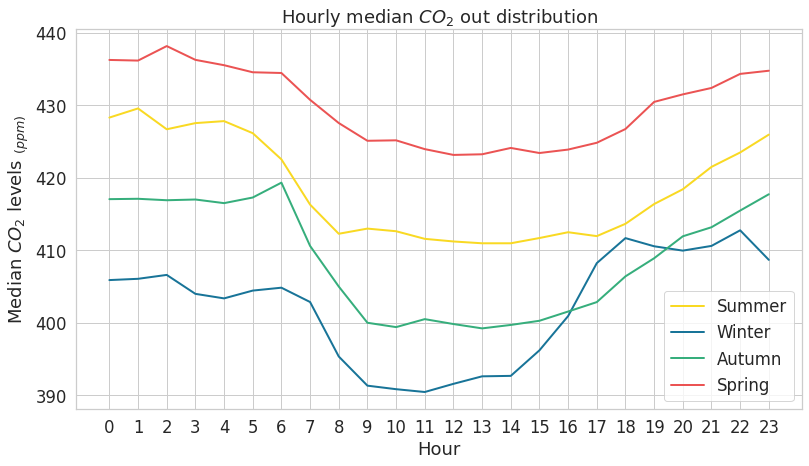

In [ ]:
# Median graph:
fig, ax = plt.subplots(1, figsize=(13,7))
for season in seasons:
  # create data to present
  by_time_avg = seasons_labels[season].groupby(seasons_labels[season].index.time).median() #group the data by time of the day avg
  # present the data for each season in graph:
  ax.plot(time, by_time_avg,color = color_dict[season],lw=2,label = season)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
# title and labels
ax.set_title('Hourly median $CO_2$ out distribution')
ax.set_ylabel('Median $CO_2$ levels $_{(ppm)}$')
ax.set_xlabel('Hour')
plt.legend()
# plt.savefig(save_results_to + 'median_co2_hourly.png',bbox_inches = "tight")

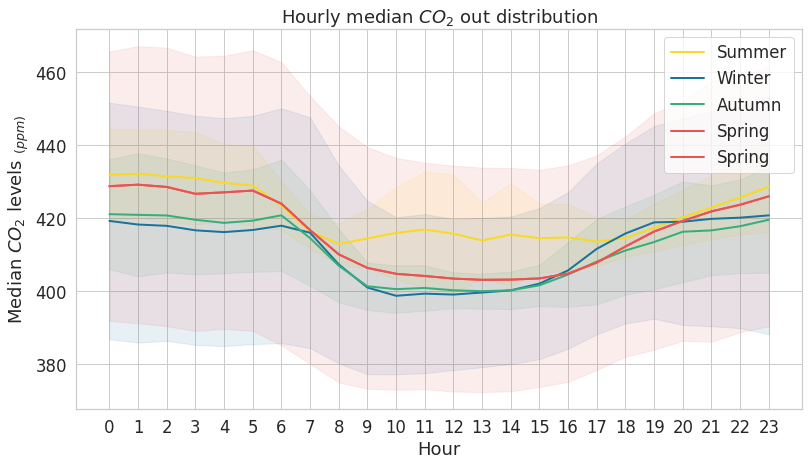

In [ ]:
# Median graph:
fig, ax = plt.subplots(1, figsize=(13,7))
for season in seasons:
  # create data to present
  by_time_avg = seasons_labels[season].groupby(seasons_labels[season].index.time).mean() #group the data by time of the day avg
  by_time_std = seasons_labels[season].groupby(seasons_labels[season].index.time).std() #group the data by time of the day avg
  # present the data for each season in graph:
  ax.fill_between(time, by_time_avg + by_time_std,by_time_avg-by_time_std,color = color_dict[season], alpha=.1)
  ax.plot(time, by_time_avg,color = color_dict[season],lw=2,label = season)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
# title and labels
ax.plot(time, by_time_avg,color = color_dict[season],lw=2,label = season)
ax.set_title('Hourly median $CO_2$ out distribution')
ax.set_ylabel('Median $CO_2$ levels $_{(ppm)}$')
ax.set_xlabel('Hour')
plt.legend()
# plt.savefig(save_results_to + 'mean_co2_hourly.png',bbox_inches = "tight")

Text(0.5, 0, 'Hour')

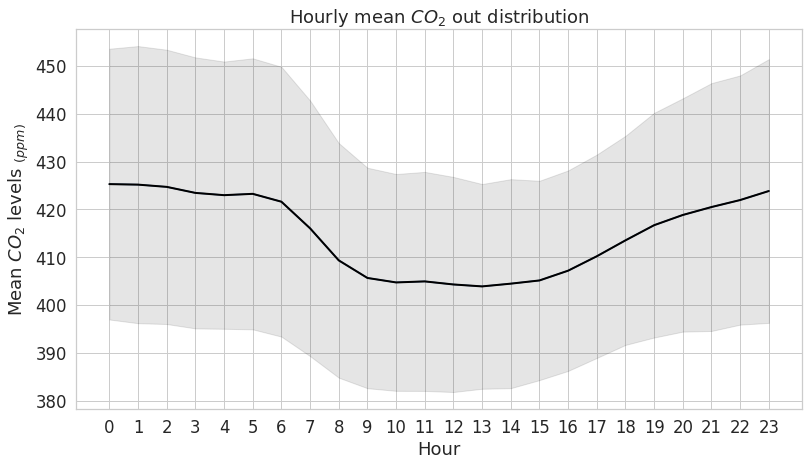

In [ ]:
by_time_avg = hour_df.groupby(hour_df.index.time).mean() #group the data by time of the day avg
by_time_std = hour_df.groupby(hour_df.index.time).std() #group the data by time of the day avg
time = np.arange(0,24,1) # array of hours for x axis
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, figsize=(13,7))
# plots
ax.fill_between(time, by_time_avg["10"] + by_time_std["10"],by_time_avg["10"]-by_time_std["10"],color = "black" ,alpha=.1)
ax.plot(time, by_time_avg)
ax.plot(time, by_time_avg,color = "black",lw=2)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
ax.set_title('Hourly mean $CO_2$ out distribution')
ax.set_ylabel('Mean $CO_2$ levels $_{(ppm)}$')
ax.set_xlabel('Hour')
# plt.savefig(save_results_to + 'mean_co2_hourly_togather.png',bbox_inches = "tight")

## **Green wall effect**

1. Create column of the difference between out and in.

2. Assuming every time that $CO_2$ in **lower** than outside it because of the plants inside that use the $CO_2$ for photosynthesis.

  ### **⚠**  we should pay attention to whether this is indeed true because there is a difference that can also be due to the fact that it takes time for air from the outside to get inside ...

3. Resample this effect over month average to see the time series. Create 2 plots:
    
  ▶  Bar plot of **absulute values** of The amount of reduction (ppm) over time.
  
  ▶ Bar plot of **precentege** of The reduction (%) over time.


###  Absulute values

In [ ]:
# Back to non resample data!
# df with out and in:
df_in_out = pd.DataFrame()
df_in_out = df[['1','10']].copy()
df_in_out.columns = ["in","out"]
df_in_out = df_in_out.resample("H").mean() # one our resample data

In [ ]:
# column with the difference between in and out:
df_in_out['diff_in_out'] = df_in_out['in'] - df_in_out['out']

# New df with all the time this different > 0 (in < out):
df_diff = df_in_out[df_in_out['diff_in_out']<0]
df_diff = df_diff['diff_in_out'] # keep just the difference column

In [ ]:
# New df with avg and std of the monthly average:
df_diff_mean = pd.DataFrame()
df_diff_mean['mean'] = df_diff.resample("M").mean()
df_diff_mean['std'] = df_diff.resample("M").std()
# month name and year column:
df_diff_mean['month_name'] = df_diff_mean.index.month_name() # for x posision graph
df_diff_mean['year'] = df_diff_mean.index.year
df_diff_mean['month_and_year'] = df_diff_mean['month_name'].astype(str)+" "+ df_diff_mean['year'].astype(str)

# keep with relevant columns:
df_diff_mean = df_diff_mean[['month_and_year','mean','std']]
# df_diff_mean = df_diff_mean.set_index("month_and_year")

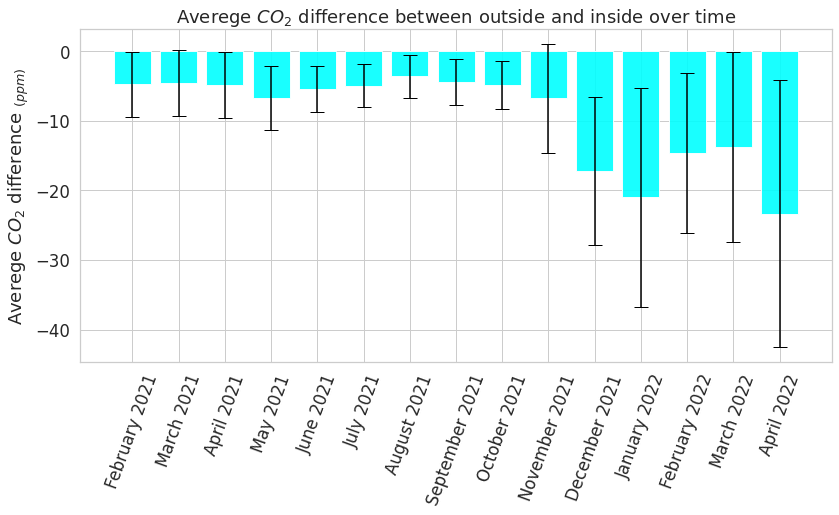

In [ ]:
# Build the plot
sns.set_theme(style="whitegrid",font_scale = 1.5)
fig, ax = plt.subplots(1, figsize=(12,7.5))
# create bar:
ax.bar(df_diff_mean['month_and_year'],df_diff_mean['mean'], yerr=df_diff_mean['std'],color = "cyan", align='center', alpha=0.9, ecolor='black', capsize=7)
ax.set_ylabel("Averege $CO_2$ difference $_{(ppm)}$")
ax.set_title('Averege $CO_2$ difference between outside and inside over time')
# ax.set_ylim(-45,10)
plt.xticks(rotation=70)
ax.yaxis.grid(True)

# # Save the figure and show
plt.tight_layout()
# plt.savefig(save_results_to + 'avg_diff_bars.png')

### Precentege

In [ ]:
df_in_out['diff_in_out_precentege'] = 100*((df_in_out['in']-df_in_out['out'])/df_in_out['out'])
# New df with all the time this different < 0 (in < out):
df_diff_p = df_in_out[df_in_out['diff_in_out_precentege']<0]
df_diff_p = df_diff_p['diff_in_out_precentege'] # keep just the difference column

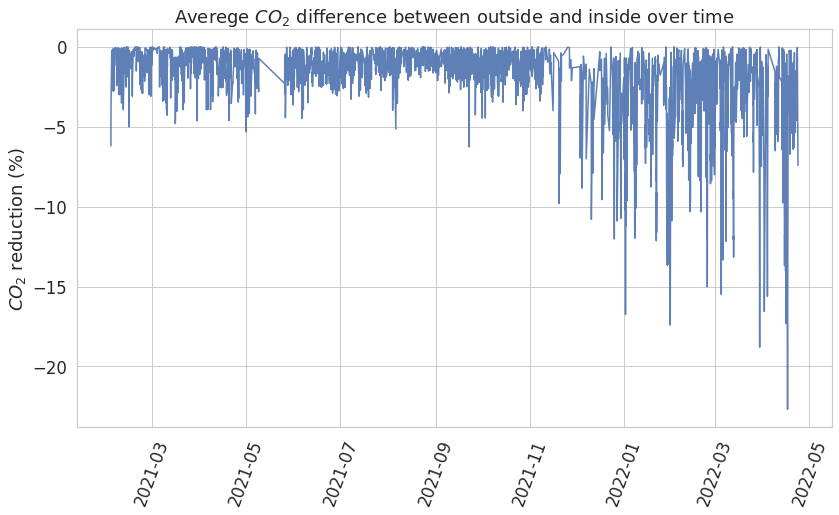

In [ ]:
# Build the plot
sns.set_theme(style="whitegrid",font_scale = 1.5)
fig, ax = plt.subplots(1, figsize=(12,7.5))
ax.plot(df_diff_p,  alpha=0.9)
ax.set_ylabel("$CO_2$ reduction (%)")
ax.set_title('Averege $CO_2$ difference between outside and inside over time')
plt.xticks(rotation=70)
ax.yaxis.grid(True)

# # Save the figure and show
plt.tight_layout()
# plt.savefig(save_results_to + 'avg_precent_diff_plot.png')

In [ ]:
# New df with avg and std of the monthly average:
df_diff_p_mean = pd.DataFrame()
df_diff_p_mean['mean'] = df_diff_p.resample("M").mean()
df_diff_p_mean['std'] = df_diff_p.resample("M").std()
# month name and year column:
df_diff_p_mean['month_name'] = df_diff_p_mean.index.month_name() # for x posision graph
df_diff_p_mean['year'] = df_diff_p_mean.index.year
df_diff_p_mean['month_and_year'] = df_diff_p_mean['month_name'].astype(str)+" "+ df_diff_p_mean['year'].astype(str)

# keep with relevant columns:
df_diff_p_mean = df_diff_p_mean[['month_and_year','mean','std']]

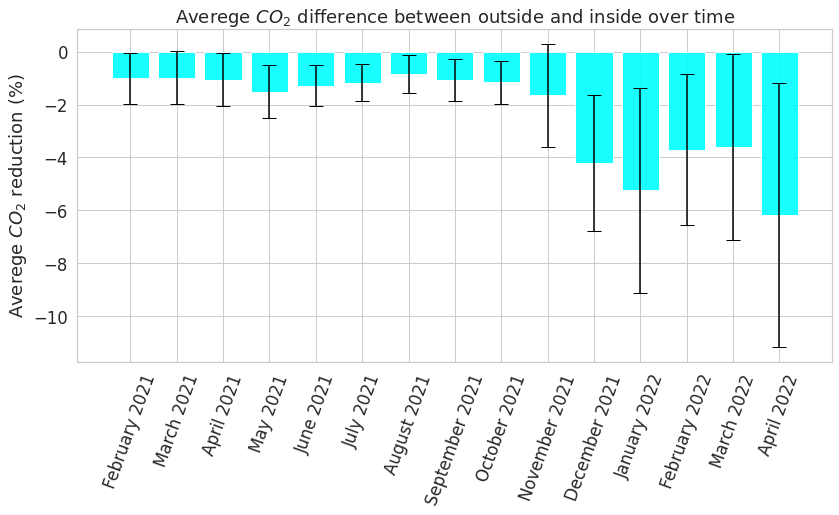

In [ ]:
# Build the plot
sns.set_theme(style="whitegrid",font_scale = 1.5)
fig, ax = plt.subplots(1, figsize=(12,7.5))
ax.bar(df_diff_p_mean['month_and_year'],df_diff_p_mean['mean'], yerr=df_diff_p_mean['std'],color = "cyan", align='center', alpha=0.9, ecolor='black', capsize=7)
ax.set_ylabel("Averege $CO_2$ reduction (%)")
ax.set_title('Averege $CO_2$ difference between outside and inside over time')
plt.xticks(rotation=70)
ax.yaxis.grid(True)

# # Save the figure and show
plt.tight_layout()
# plt.savefig(save_results_to + 'avg_precent_diff_bars.png')

### Is the different is noise or because of plant?

We will look at the time distribution where the CO2 levels inside are low from the outside. If it only occurs when there is light in the lab (7AM - 12AM) it is 
probably because of the plants. If it happens the same way at night, it's probably due to data noise.

we take the **maximum difference in every day and look on his hour**.

Its  becaue we want to avoid noise due to the lag we have in aur circulation or any eror in the device.


In [ ]:
df_diff 

TIMESTAMP
2021-02-02 06:00:00   -29.975
2021-02-02 07:00:00   -19.000
2021-02-02 18:00:00    -1.675
2021-02-02 22:00:00    -1.000
2021-02-02 23:00:00    -7.900
                        ...  
2022-04-23 10:00:00   -18.200
2022-04-23 11:00:00   -19.825
2022-04-23 12:00:00   -19.750
2022-04-23 13:00:00   -22.800
2022-04-23 14:00:00   -27.150
Name: diff_in_out, Length: 3651, dtype: float64

Lets check this dis

Text(0.5, 0, 'Hour')

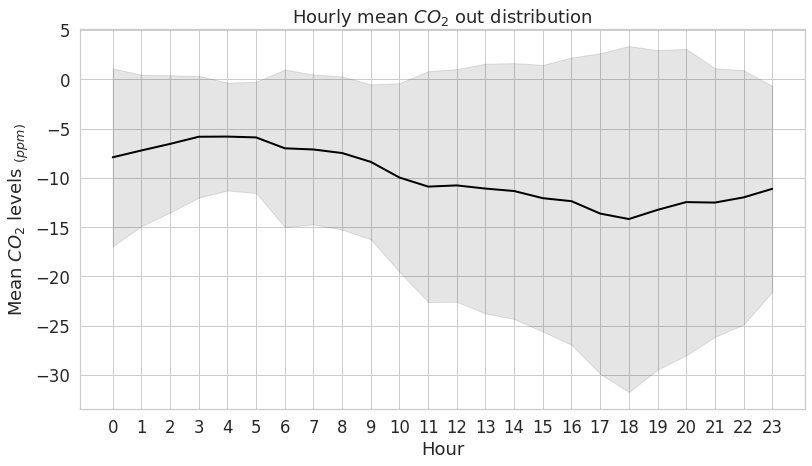

In [ ]:
by_time_avg = df_diff.groupby(df_diff.index.time).mean() #group the data by time of the day avg
by_time_std = df_diff.groupby(df_diff.index.time).std() #group the data by time of the day avg
time = np.arange(0,24,1) # array of hours for x axis
fig, ax = plt.subplots(1, figsize=(13,7))
# plots
ax.fill_between(time, by_time_avg + by_time_std,by_time_avg-by_time_std,color = "black" ,alpha=.1)
ax.plot(time, by_time_avg,color = "black",lw=2)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
ax.set_title('Hourly mean $CO_2$ out distribution')
ax.set_ylabel('Mean $CO_2$ levels $_{(ppm)}$')
ax.set_xlabel('Hour')
# plt.savefig(save_results_to + 'mean_co2_hourly_togather.png',bbox_inches = "tight")

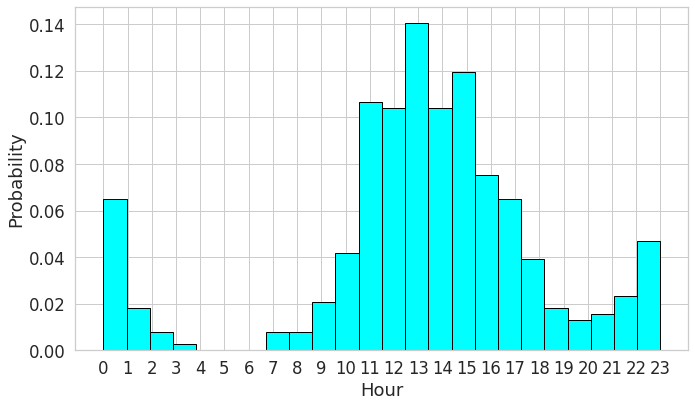

In [ ]:
diff_max = df_in_out.loc[df_in_out.groupby(df_in_out.index.date)['diff_in_out'].idxmax().dropna()]
diff_max = diff_max[diff_max['diff_in_out']>=15]

# Build the plot
fig, ax = plt.subplots(1, figsize=(10,6))
ax.hist(diff_max.index.hour,density=True,bins = 24,color = "cyan",edgecolor='black')
ax.set_xlabel("Hour")
ax.set_ylabel("Probability")
# ax.set_title('Distribution of the hour of maximum difference between in and out')
ax.set_title('')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
# # Save the figure and show
plt.tight_layout()
plt.savefig(save_results_to + 'avg_distribution.png')

### Statistics:

In [ ]:
start1 = "2021-04-05 08:00:00" #date of planting
start2 = "2021-11-19 00:00:00" # time with plants + air circulation:

#### 1 hour resample:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1            group2       Diff      Lower      Upper  \
0      No_plants     Plant_with_AC   0.366305  -0.783099   1.515708   
1      No_plants  Plant_without_AC  13.122342  11.931850  14.312834   
2  Plant_with_AC  Plant_without_AC  12.756037  11.950042  13.562031   

     q-value   p-value  
0   1.056739  0.716122  
1  36.549596  0.001000  
2  52.478505  0.001000

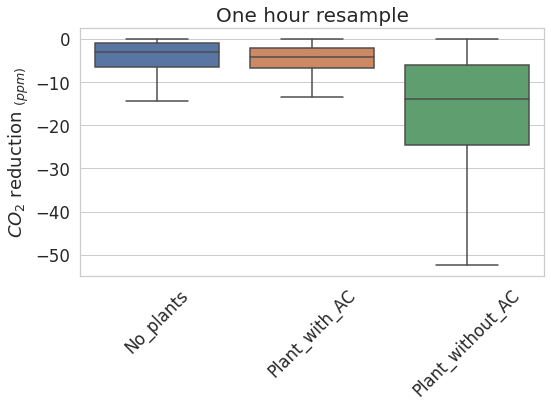

In [ ]:
# create df with column of values and column of class:
anova_df = df_in_out[['diff_in_out']]
anova_df = anova_df[anova_df['diff_in_out']<0]
anova_df["groups"] = 0
anova_df['groups'][:start1] = "No_plants"
anova_df['groups'][start1:start2] = "Plant_with_AC"
anova_df['groups'][start2:] = "Plant_without_AC"


# boxplot
plt.subplots(1, figsize=(8,6))
a = sns.boxplot(data=anova_df, x='groups', y="diff_in_out",showfliers = False)
a.set_ylabel("$CO_2$ reduction $_{(ppm)}$",fontsize = 18)
a.set_xlabel("")
a.set_title("One hour resample",fontsize = 20 )
plt.xticks(rotation=45)
# save:
plt.tight_layout()
# plt.savefig(save_results_to + 'daytime_dist_no_outlayers.png')
# Anova + Tuky test:
res = stat()
res.tukey_hsd(df=anova_df, res_var='diff_in_out',
              xfac_var='groups', anova_model='diff_in_out ~ C(groups)')
anova_results = res.tukey_summary
# anova_results.to_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_analysis_charts/summary_statistics_season.xlsx")
anova_results

Compare the $co_2$ reduction with the actibity of the wall:
1. import A data
2. create graph of $co_2$ reduction in different times (before the wall, after the wall with AC, after the wall without AC)
3. add the plot of the average A of all the species.

In [ ]:
# import A data:
dfa = pd.read_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/df_A_data.xlsx")
dfa = dfa.set_index("time") #index column of time in day 
dfa

Hour       Avg       std
time                            
8.50   08:30  1.943397  0.807984
11.00  11:00  2.264118  0.830441
13.00  13:00  2.012888  0.839652
15.50  15:30  1.850985  0.873015
18.75  18:45  1.653299  0.967276
21.00  21:00  1.463575  0.883427

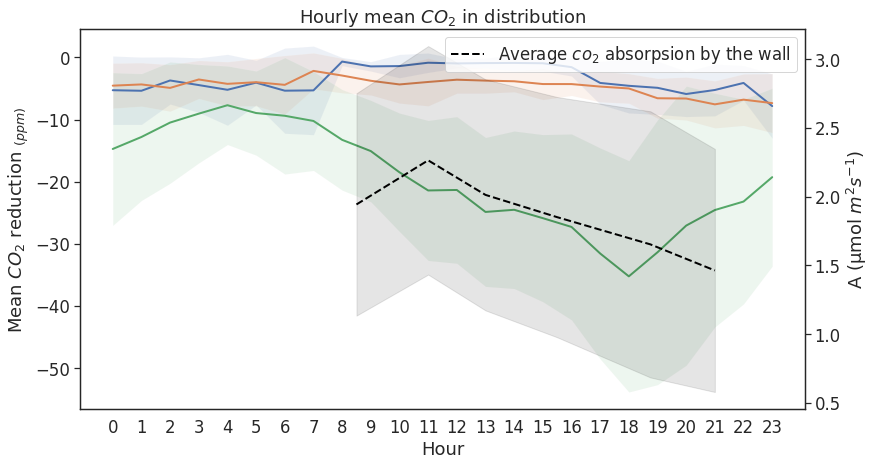

In [ ]:
sns.set_style("white")
fig, ax = plt.subplots(1, figsize=(13,7))
time = np.arange(0,24,1) # array of hours for x axis
# time_a = np.asarray([8.5,11,13,15.5,18.75,21]) # array of hours for x axis for A
for i in anova_df['groups'].unique():
  df_group = anova_df[anova_df['groups']== i]
  by_time_avg = df_group.groupby(df_group.index.time).mean() #group the data by time of the day avg
  by_time_std = df_group.groupby(df_group.index.time).std() #group the data by time of the day avg
  # co2 reduction plots
  ax.fill_between(time, by_time_avg["diff_in_out"] + by_time_std["diff_in_out"],
  by_time_avg["diff_in_out"]-by_time_std["diff_in_out"],alpha=.1)
  ax.plot(time, by_time_avg,lw=2,label=i)

# A plots with different axis
ax2 = ax.twinx()
ax2.fill_between(dfa.index,
                dfa["Avg"] + dfa["std"],
                dfa["Avg"]-dfa["std"],alpha=.1,color="black")
ax2.plot(dfa['Avg'],lw=2,ls="--",color="black",label = "Average $co_2$ absorpsion by the wall")
ax2.set_ylabel("A (µmol $m^2 s^{-1}$)")
# plt.axhline(y=0, color = "black")  
  
# graph adjustments and labels:
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
ax.set_title('Hourly mean $CO_2$ in distribution')
ax.set_ylabel('Mean $CO_2$ reduction $_{(ppm)}$')
ax.set_xlabel('Hour')
plt.legend()
# plt.savefig(save_results_to + '3groups_overday',bbox_inches = "tight")

#### 3 hours resample:

In [ ]:
# Add label to boxplot
import matplotlib.patheffects as path_effects

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1            group2       Diff      Lower      Upper  \
0      No_plants     Plant_with_AC   0.686349  -1.366444   2.739143   
1      No_plants  Plant_without_AC  13.777911  11.674202  15.881620   
2  Plant_with_AC  Plant_without_AC  13.091562  11.631344  14.551780   

     q-value   p-value  
0   1.109741  0.694818  
1  21.738005  0.001000  
2  29.757452  0.001000

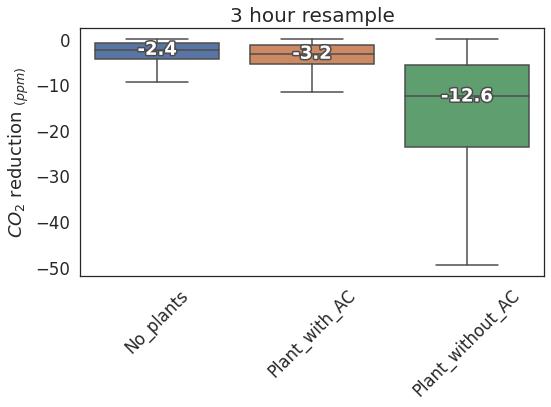

In [ ]:
# create df with column of values and column of class:
anova_df = df_in_out[['diff_in_out']].resample("3H").mean()
anova_df = anova_df[anova_df['diff_in_out']<0]
anova_df["groups"] = 0
anova_df['groups'][:start1] = "No_plants"
anova_df['groups'][start1:start2] = "Plant_with_AC"
anova_df['groups'][start2:] = "Plant_without_AC"
anova_df

# boxplot:
plt.subplots(1, figsize=(8,6))
a = sns.boxplot(data=anova_df, x='groups', y="diff_in_out",showfliers = False)
add_median_labels(a)
a.set_ylabel("$CO_2$ reduction $_{(ppm)}$",fontsize = 18)
a.set_xlabel("")
a.set_title("3 hour resample",fontsize = 20 )
plt.xticks(rotation=45)
# save:
plt.tight_layout()
# plt.savefig(save_results_to + 'daytime_dist_no_outlayers.png')

# statistics:
# Anova + Tuky test:
res = stat()
res.tukey_hsd(df=anova_df, res_var='diff_in_out',
              xfac_var='groups', anova_model='diff_in_out ~ C(groups)')
anova_results = res.tukey_summary
anova_results

Same with precentage:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



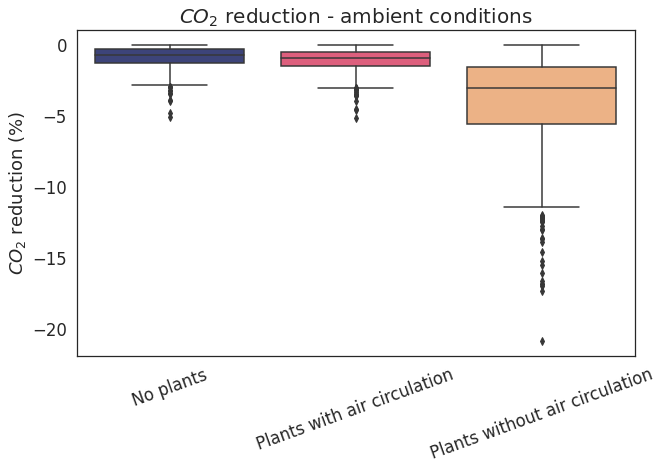

In [ ]:
anova_df_p = pd.DataFrame()
anova_df_p['reduction(p)']= df_diff_p.resample("3H").mean()
anova_df_p= anova_df_p[anova_df_p<0]
anova_df_p["groups"] = 0
anova_df_p['groups'][:start1] = "No_plants"
anova_df_p['groups'][start1:start2] = "Plant_with_AC"
anova_df_p['groups'][start2:] = "Plant_without_AC"
# anova_df_p
# boxplot:
plt.subplots(1, figsize=(10,6))
# palette = ['#16db65','#058c42','#04471c','#0d2818','#020202']
palette = ["#333C83", "#F24A72", "#FDAF75", "#EAEA7F"]
a = sns.boxplot(data=anova_df_p, x='groups', y="reduction(p)",palette=palette)
# add labels of median:
# add_median_labels(a)
a.set_ylabel("$CO_2$ reduction (%)",fontsize = 18)
a.set_xlabel("")
a.set_title("$CO_2$ reduction - ambient conditions",fontsize = 20 )
a.set_xticklabels(['No plants', 'Plants with air circulation',"Plants without air circulation"])
plt.xticks(rotation=20)
# save:
# plt.tight_layout()
# anova_df_p.to_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_analysis_charts/summary_statistics_season.xlsx")
# plt.savefig("/content/drive/MyDrive/Yehuda_David/Papers/Poster_ISEES2022/Figures/" + 'boxplot_low_co2_levels.png',bbox_inches = "tight")
plt.savefig(save_results_to + 'daytime_dist_no_outlayers_precent.png',bbox_inches = "tight")

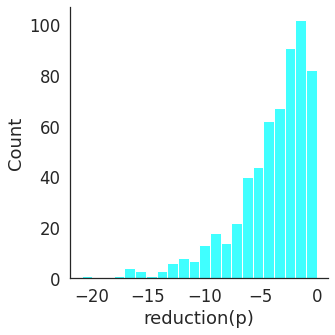

In [ ]:
# fig,ax = plt.subplots(1, figsize=(10,6))
ax= sns.displot(data= anova_df_p[anova_df_p['groups'] == "Plant_without_AC"],x="reduction(p)",color = "cyan")
# a.set_title("$CO_2$ reduction - ambient conditions",fontsize = 20 )

#### 5 hour resmple:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1            group2       Diff      Lower      Upper  \
0      No_plants     Plant_with_AC   0.551193  -2.312095   3.414481   
1      No_plants  Plant_without_AC  13.084655  10.193219  15.976091   
2  Plant_with_AC  Plant_without_AC  12.533462  10.588072  14.478851   

     q-value   p-value  
0   0.639697  0.885139  
1  15.037793  0.001000  
2  21.409171  0.001000

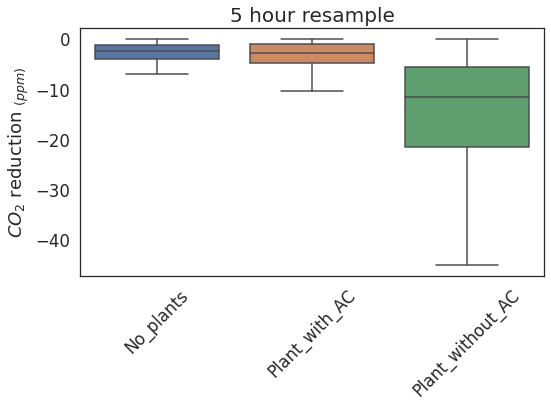

In [ ]:
# create df with column of values and column of class:
anova_df = df_in_out[['diff_in_out']].resample("5H").mean()
anova_df = anova_df[anova_df['diff_in_out']<0]
anova_df["groups"] = 0
anova_df['groups'][:start1] = "No_plants"
anova_df['groups'][start1:start2] = "Plant_with_AC"
anova_df['groups'][start2:] = "Plant_without_AC"
anova_df

# boxplot:
plt.subplots(1, figsize=(8,6))
a = sns.boxplot(data=anova_df, x='groups', y="diff_in_out",showfliers = False)
a.set_ylabel("$CO_2$ reduction $_{(ppm)}$",fontsize = 18)
a.set_xlabel("")
a.set_title("5 hour resample",fontsize = 20 )
plt.xticks(rotation=45)
# save:
plt.tight_layout()
# plt.savefig(save_results_to + 'daytime_dist_no_outlayers.png')

# statistics:
# Anova + Tuky test:
res = stat()
res.tukey_hsd(df=anova_df, res_var='diff_in_out',
              xfac_var='groups', anova_model='diff_in_out ~ C(groups)')
anova_results = res.tukey_summary
# anova_results.to_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_analysis_charts/summary_statistics_season.xlsx")
anova_results

## Draft

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



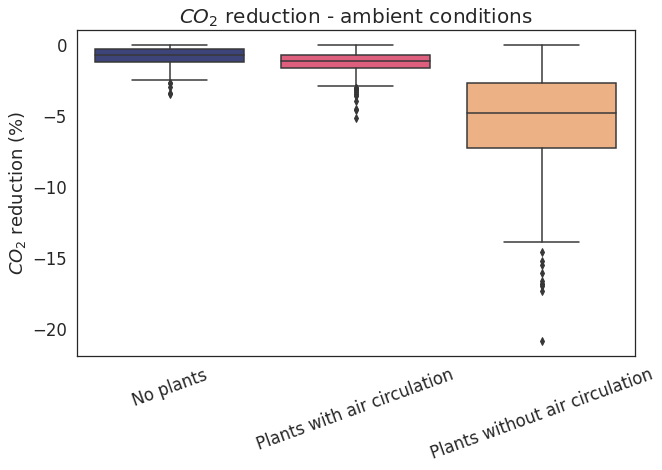

In [ ]:
anova_df_p = pd.DataFrame()
anova_df_p['reduction(p)']= df_diff_p.resample("3H").mean()
anova_df_p= anova_df_p[anova_df_p<0]
anova_df_p["groups"] = 0
anova_df_p['groups'][:start1] = "No_plants"
anova_df_p['groups'][start1:start2] = "Plant_with_AC"
anova_df_p['groups'][start2:] = "Plant_without_AC"

def day_column(x):
    if (x.hour > 7) and (x.hour <= 23):
        return 'Day'
    else:
        return'Night'

anova_df_p['day_night'] = df_in_out.index.to_series().apply(day_column)
anova_df_p = anova_df_p[anova_df_p['day_night']=="Day"]

# boxplot:
plt.subplots(1, figsize=(10,6))
# palette = ['#16db65','#058c42','#04471c','#0d2818','#020202']
palette = ["#333C83", "#F24A72", "#FDAF75", "#EAEA7F"]
a = sns.boxplot(data=anova_df_p, x='groups', y="reduction(p)",palette=palette)
# add labels of median:
# add_median_labels(a)
a.set_ylabel("$CO_2$ reduction (%)",fontsize = 18)
a.set_xlabel("")
a.set_title("$CO_2$ reduction - ambient conditions",fontsize = 20 )
a.set_xticklabels(['No plants', 'Plants with air circulation',"Plants without air circulation"])
plt.xticks(rotation=20)
# save:
# plt.tight_layout()
anova_df_p.to_excel("/content/drive/MyDrive/Greenwall/co2_and_counting_people/CO2_analysis_charts/summary_statistics_days.xlsx")
plt.savefig(save_results_to + 'daytime_precent.png',bbox_inches = "tight")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

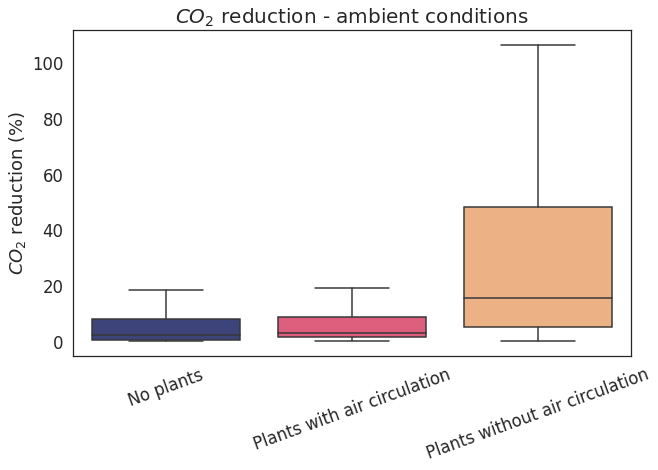

In [ ]:
anova_df_p = pd.DataFrame()
anova_df_p['reduction(p)']= df_in_out[['diff_in_out']].resample("1H").mean()
anova_df_p= anova_df_p[anova_df_p>0]
anova_df_p["groups"] = 0
anova_df_p['groups'][:start1] = "No_plants"
anova_df_p['groups'][start1:start2] = "Plant_with_AC"
anova_df_p['groups'][start2:] = "Plant_without_AC"

def day_column(x):
    if (x.hour < 6) and (x.hour >= 2):
        return 'Night'
    else:
        return'Day'

anova_df_p['day_night'] = df_in_out.index.to_series().apply(day_column)
anova_df_p = anova_df_p[anova_df_p['day_night']=="Night"]


# boxplot:
plt.subplots(1, figsize=(10,6))
# palette = ['#16db65','#058c42','#04471c','#0d2818','#020202']
palette = ["#333C83", "#F24A72", "#FDAF75", "#EAEA7F"]
a = sns.boxplot(data=anova_df_p, x='groups', y="reduction(p)",palette=palette,showfliers = False)
# add labels of median:
# add_median_labels(a)
a.set_ylabel("$CO_2$ reduction (%)",fontsize = 18)
a.set_xlabel("")
a.set_title("$CO_2$ reduction - ambient conditions",fontsize = 20 )
a.set_xticklabels(['No plants', 'Plants with air circulation',"Plants without air circulation"])
plt.xticks(rotation=20)

In [ ]:
# df_in_out['in'].plot()
# anova_df_p['reduction(p)'].plot()